# **Implementasi Latent Directlet Allocation (LDA)**

## Preprocessing

In [ ]:
# Membaca data
import pandas as pd
path = '/content/drive/MyDrive/ppw/tugas ppw/dataset/pta-infor-abstrak.csv'
data = pd.read_csv(path, delimiter=';')
data

,Judul,Nama Penulis,Pembimbing I,Pembimbing II,Abstrak,Prodi,Kelas
0,Gerak Pekerja Pada Game Real Time Strategy Men...,Adi Chandra Laksono,"Kurniawan Eka P, S.Kom., Msc","Arik Kurniawati, S.Kom., M.T.",Gerak pekerja ada pada game yang memiliki genr...,Jurusan Teknik Informatika,RPL
1,RANCANG BANGUN GAME PERAWATAN SAPI KARAPAN MEN...,NURRACHMAT,"Arik Kurniawati, S.Kom., M.T.","Kurniawan Eka Permana, S.Kom., MSc.","Perkembangan game yang semakin pesat, memberik...",Jurusan Teknik Informatika,RPL
2,EKSTRAKSI FITUR BERBASIS TWO DIMENSIONAL LINEA...,Muhammad Choirur Rozi,"Dr. Arif Muntasa, S.Si.,M.T","Fitri Damayanti, S.Kom.,M.kom",Sistem pengenalan wajah adalah suatu sistem un...,Jurusan Teknik Informatika,Komputasi
3,IMPLEMENTASI ALGORITMA PRIM DAN DEPTH FIRST ...,M Khoiril Anwar,"Cucun Very Angkoso, S.T., M.T.","Arik Kurniawati S. Kom., M.T.",Teknologi mobile game beroperating system open...,Jurusan Teknik Informatika,Komputasi
4,Perancangan Sistem Informasi Badan Kepegawaian...,MALIKUL HAMZAH,"Moch. Kautsar Sophan, S.Kom., M.MT.","Yeni Kustiyaningsih, S.Kom., M.Kom.",Kantor Badan Kepegawaian kota Bangkalan adalah...,Jurusan Teknik Informatika,RPL
...,...,...,...,...,...,...,...
848,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...,Jurusan Teknik Informatika,Komputasi
849,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...,Jurusan Teknik Informatika,Komputasi
850,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...,Jurusan Teknik Informatika,Komputasi
851,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...,Jurusan Teknik Informatika,Komputasi


In [ ]:
# Cek jumlah data
data.shape

(853, 7)

In [ ]:
# Ambil label
datalabel = data['Kelas']
datalabel

0            RPL
1            RPL
2      Komputasi
3      Komputasi
4            RPL
         ...    
848    Komputasi
849    Komputasi
850    Komputasi
851    Komputasi
852    Komputasi
Name: Kelas, Length: 853, dtype: object

## Ekstraksi Fitur

In [ ]:
# Menggunakan data tfidf yang telah disimpan sebelumnya
tfidf_df = pd.read_csv('/content/drive/MyDrive/ppw/tugas ppw/dataset/tfidf.csv')
tfidf_df

,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,absah,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Implementasi LDA

In [ ]:
import numpy as np
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import os

In [ ]:
k = 3
alpha = 0.1
beta = 0.2

In [ ]:
lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)

In [ ]:
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(tfidf_df)

In [ ]:
proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

,Topik 1,Topik 2,Topik 3
0,0.016049,0.967888,0.016063
1,0.016953,0.966094,0.016954
2,0.015291,0.969416,0.015292
3,0.016642,0.966716,0.016642
4,0.015065,0.969871,0.015065
...,...,...,...
817,0.012371,0.975257,0.012372
818,0.013011,0.973978,0.013011
819,0.011742,0.976515,0.011743
820,0.014000,0.972000,0.014001


In [ ]:
df_final = pd.concat([proporsi_topik_dokumen_df,datalabel],axis=1)
df_final

,Topik 1,Topik 2,Topik 3,Kelas
0,0.016049,0.967888,0.016063,RPL
1,0.016953,0.966094,0.016954,RPL
2,0.015291,0.969416,0.015292,Komputasi
3,0.016642,0.966716,0.016642,Komputasi
4,0.015065,0.969871,0.015065,RPL
...,...,...,...,...
848,NaN,NaN,NaN,Komputasi
849,NaN,NaN,NaN,Komputasi
850,NaN,NaN,NaN,Komputasi
851,NaN,NaN,NaN,Komputasi


In [ ]:
df_final.isna()
df_final.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Kelas'],inplace = True)
# Cek kembali nilai NaN
df_final

,Topik 1,Topik 2,Topik 3,Kelas
0,0.016049,0.967888,0.016063,RPL
1,0.016953,0.966094,0.016954,RPL
2,0.015291,0.969416,0.015292,Komputasi
3,0.016642,0.966716,0.016642,Komputasi
4,0.015065,0.969871,0.015065,RPL
...,...,...,...,...
817,0.012371,0.975257,0.012372,RPL
818,0.013011,0.973978,0.013011,Komputasi
819,0.011742,0.976515,0.011743,Komputasi
820,0.014000,0.972000,0.014001,RPL


In [ ]:
df_final.isna().sum()

Topik 1    0
Topik 2    0
Topik 3    0
Kelas      0
dtype: int64

In [ ]:
# Proporsi kata pada topik
fitur = tfidf_df.columns.tolist()
ProporsiKataTopik = lda_model.components_
ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
ProporsiKataTopik_df.insert(0,'Topik',['Topik 1', 'Topik 2', 'Topik 3'])
ProporsiKataTopik_df

,Topik,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,Topik 1,0.200000,0.200000,0.200000,0.200000,0.20000,0.200000,0.200000,0.200001,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.204663,0.204663
1,Topik 2,0.328793,0.385749,0.200000,0.334778,0.35303,0.267158,0.211151,0.303441,0.527557,...,0.349565,0.200000,0.280755,1.499126,0.72741,0.442267,0.523023,0.443579,0.288385,0.288385
2,Topik 3,0.200000,0.200000,0.314202,0.200000,0.20000,0.200000,0.379349,0.200002,0.200000,...,0.200000,0.288854,0.200000,0.200000,0.20000,0.200000,0.200000,0.210440,0.200000,0.200000


## Modeling

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold,train_test_split,cross_val_score

from sklearn.naive_bayes import GaussianNB

In [ ]:
#Train and Test split
X = df_final.iloc[:,:3]
y = df_final['Kelas']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)
X

,Topik 1,Topik 2,Topik 3
0,0.016049,0.967888,0.016063
1,0.016953,0.966094,0.016954
2,0.015291,0.969416,0.015292
3,0.016642,0.966716,0.016642
4,0.015065,0.969871,0.015065
...,...,...,...
817,0.012371,0.975257,0.012372
818,0.013011,0.973978,0.013011
819,0.011742,0.976515,0.011743
820,0.014000,0.972000,0.014001


In [ ]:
nbT3 = GaussianNB()
nbT3.fit(X_train, y_train)
Y_prediction = nbT3.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb = round(nbT3.score(X_train, y_train) * 100, 2)
print('akurasi nb', acc_nb)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

print('akurasi knn', acc_knn)

akurasi nb 49.91
akurasi knn 75.48


In [ ]:
k = 4
alpha = 0.1
beta = 0.2
lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(tfidf_df)

In [ ]:
proporsi_topik_dokumen_df4 = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df4

,Topik 1,Topik 2,Topik 3,Topik 4
0,0.015794,0.633535,0.334878,0.015794
1,0.016671,0.757331,0.209328,0.016671
2,0.015061,0.954816,0.015062,0.015061
3,0.016369,0.950891,0.016370,0.016369
4,0.014841,0.955476,0.014842,0.014841
...,...,...,...,...
817,0.012220,0.274156,0.701404,0.012220
818,0.012844,0.961459,0.012852,0.012844
819,0.011606,0.965181,0.011608,0.011606
820,0.013807,0.545794,0.426593,0.013807


In [ ]:
df_final4 = pd.concat([proporsi_topik_dokumen_df4,datalabel],axis=1)
df_final4

,Topik 1,Topik 2,Topik 3,Topik 4,Kelas
0,0.015794,0.633535,0.334878,0.015794,RPL
1,0.016671,0.757331,0.209328,0.016671,RPL
2,0.015061,0.954816,0.015062,0.015061,Komputasi
3,0.016369,0.950891,0.016370,0.016369,Komputasi
4,0.014841,0.955476,0.014842,0.014841,RPL
...,...,...,...,...,...
848,NaN,NaN,NaN,NaN,Komputasi
849,NaN,NaN,NaN,NaN,Komputasi
850,NaN,NaN,NaN,NaN,Komputasi
851,NaN,NaN,NaN,NaN,Komputasi


In [ ]:
df_final4.isna()
df_final4.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Kelas'],inplace = True)
# Cek kembali nilai NaN
df_final4

,Topik 1,Topik 2,Topik 3,Topik 4,Kelas
0,0.015794,0.633535,0.334878,0.015794,RPL
1,0.016671,0.757331,0.209328,0.016671,RPL
2,0.015061,0.954816,0.015062,0.015061,Komputasi
3,0.016369,0.950891,0.016370,0.016369,Komputasi
4,0.014841,0.955476,0.014842,0.014841,RPL
...,...,...,...,...,...
817,0.012220,0.274156,0.701404,0.012220,RPL
818,0.012844,0.961459,0.012852,0.012844,Komputasi
819,0.011606,0.965181,0.011608,0.011606,Komputasi
820,0.013807,0.545794,0.426593,0.013807,RPL


In [ ]:
#Train and Test split
X = df_final4.iloc[:,:4]
y = df_final4['Kelas']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

nbT3 = GaussianNB()
nbT3.fit(X_train, y_train)
Y_prediction = nbT3.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb2 = round(nbT3.score(X_train, y_train) * 100, 2)
print('akurasi nb', acc_nb2)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X_train, y_train)
Y_pred = knn2.predict(X_test)
accuracy_knn2=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn2 = round(knn2.score(X_train, y_train) * 100, 2)

print('akurasi knn2', acc_knn2)

akurasi nb 54.26
akurasi knn2 72.87


In [ ]:
k = 5
alpha = 0.1
beta = 0.2
lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(tfidf_df)

proporsi_topik_dokumen_df5 = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df5

df_final5 = pd.concat([proporsi_topik_dokumen_df5,datalabel],axis=1)

df_final5.isna()
df_final5.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Kelas'],inplace = True)
# Cek kembali nilai NaN
df_final5


,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Kelas
0,0.015548,0.015548,0.015548,0.015548,0.937808,RPL
1,0.016397,0.016397,0.016397,0.016397,0.934412,RPL
2,0.210231,0.014840,0.014838,0.014838,0.745254,Komputasi
3,0.016106,0.016106,0.016106,0.016106,0.935578,Komputasi
4,0.014624,0.014624,0.014624,0.014624,0.941504,RPL
...,...,...,...,...,...,...
817,0.012072,0.012073,0.012074,0.287149,0.676632,RPL
818,0.012681,0.012681,0.012681,0.012681,0.949276,Komputasi
819,0.011473,0.011493,0.011473,0.011473,0.954087,Komputasi
820,0.013619,0.013628,0.013619,0.013619,0.945516,RPL


In [ ]:
#Train and Test split
X = df_final5.iloc[:,:5]
y = df_final5['Kelas']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

nbT3 = GaussianNB()
nbT3.fit(X_train, y_train)
Y_prediction = nbT3.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb3 = round(nbT3.score(X_train, y_train) * 100, 2)
print('akurasi nb', acc_nb3)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)
Y_pred = knn3.predict(X_test)
accuracy_knn3=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn3 = round(knn3.score(X_train, y_train) * 100, 2)

print('akurasi knn3', acc_knn3)

akurasi nb 49.91
akurasi knn3 76.35


In [ ]:
k = 6
alpha = 0.1
beta = 0.2
lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(tfidf_df)

proporsi_topik_dokumen_df6 = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df6

df_final6 = pd.concat([proporsi_topik_dokumen_df6,datalabel],axis=1)

df_final6.isna()
df_final6.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6', 'Kelas'],inplace = True)
# Cek kembali nilai NaN

#Train and Test split
X = df_final6.iloc[:,:5]
y = df_final6['Kelas']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

nbT3 = GaussianNB()
nbT3.fit(X_train, y_train)
Y_prediction = nbT3.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb4 = round(nbT3.score(X_train, y_train) * 100, 2)
print('akurasi nb', acc_nb4)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn4 = KNeighborsClassifier(n_neighbors = 3)
knn4.fit(X_train, y_train)
Y_pred = knn4.predict(X_test)
accuracy_knn4=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn4 = round(knn4.score(X_train, y_train) * 100, 2)

print('akurasi knn4', acc_knn4)

akurasi nb 48.52
akurasi knn4 74.43


In [ ]:
k = 7
alpha = 0.1
beta = 0.2
lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(tfidf_df)

proporsi_topik_dokumen_df7 = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6', 'Topik 7'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df7

df_final7 = pd.concat([proporsi_topik_dokumen_df7,datalabel],axis=1)

df_final7.isna()
df_final7.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6', 'Topik 7', 'Kelas'],inplace = True)
# Cek kembali nilai NaN

#Train and Test split
X = df_final7.iloc[:,:5]
y = df_final7['Kelas']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

nbT3 = GaussianNB()
nbT3.fit(X_train, y_train)
Y_prediction = nbT3.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb5 = round(nbT3.score(X_train, y_train) * 100, 2)
print('akurasi nb', acc_nb5)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors = 3)
knn5.fit(X_train, y_train)
Y_pred = knn5.predict(X_test)
accuracy_knn5=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn5 = round(knn5.score(X_train, y_train) * 100, 2)

print('akurasi knn5', acc_knn5)

akurasi nb 49.57
akurasi knn5 75.13


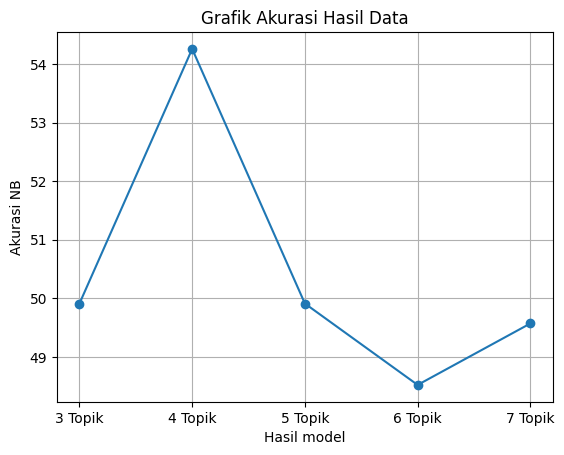

In [ ]:
import matplotlib.pyplot as plt

# Contoh data akurasi (ganti dengan data akurasi Anda)
hasil_akurasi = [acc_nb, acc_nb2, acc_nb3, acc_nb4, acc_nb5]

# Nomor iterasi atau label untuk setiap hasil akurasi (misalnya, iterasi 1, iterasi 2, dst.)
nomor_iterasi = ['3 Topik', '4 Topik', '5 Topik', '6 Topik', '7 Topik']

# Membuat plot
plt.plot(nomor_iterasi, hasil_akurasi, marker='o', linestyle='-')

# Menambahkan label sumbu x dan y
plt.xlabel('Hasil model')
plt.ylabel('Akurasi NB')

# Menambahkan judul plot
plt.title('Grafik Akurasi Hasil Data')

# Menampilkan grid (opsional)
plt.grid(True)

# Menampilkan plot
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Hasil akurasi Model Naive Bayes dan Model KNN (ganti dengan hasil akurasi Anda)
# akurasi_nb = [acc_nb3, acc_nb4, acc_nb5, acc_nb6, acc_nb7, acc_nb8]  # Contoh hasil akurasi NB
# akurasi_knn = [acc_knn3, acc_knn4, acc_knn5, acc_knn6, acc_knn7, acc_knn8]  # Contoh hasil akurasi KNN

# # Nomor iterasi atau label untuk setiap hasil akurasi (misalnya, iterasi 1, iterasi 2, dst.)
# nomor_iterasi = range(3,9)

# # Lebar batang dalam diagram
# lebar_batang = 0.2
# # Membuat posisi batang untuk kedua model
# posisi_nb = np.arange(len(nomor_iterasi))
# posisi_knn = [x + lebar_batang for x in posisi_nb]

# # Mengatur ukuran gambar
# plt.figure(figsize=(10, 6))

# # Membuat plot
# plt.bar(posisi_nb, akurasi_nb, lebar_batang, label='Naive Bayes', color='blue')
# plt.bar(posisi_knn, akurasi_knn, lebar_batang, label='K-Nearest Neighbors', color='green')

# # Menambahkan label sumbu x dan y
# plt.xlabel('Iterasi')
# plt.ylabel('Akurasi')

# # Menambahkan judul plot
# plt.title('Perbandingan Akurasi Model Naive Bayes dan K-Nearest Neighbors')

# # Menambahkan label pada sumbu x (menggunakan nomor iterasi)
# plt.xticks([pos + lebar_batang / 2 for pos in posisi_nb], nomor_iterasi)

# # Menampilkan legenda
# plt.legend()

# # Menampilkan plot
# plt.show()
